# **CognoRise InfoTech**
# **Machine Learning Internship**
# **Task (2) Diabetes Prediction Model by *Marina Nashaat***


# *The Diabetes Prediction Model utilizes multiple classifiers, including Random Forest, Logistic Regression, and three additional machine learning algorithms, to analyze patient data and predict the risk of diabetes. With a user-friendly interface, it offers personalized recommendations based on input parameters, providing an accurate and accessible tool for individual risk assessment.*

# **Importing all Necessary Libraires**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading DataSet**

In [3]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

# **Discovering DataSet**

In [4]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [5]:
df.shape

(100000, 9)

In [6]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


# **Preprocessing the Data**

In [10]:
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['smoking_history'] = df['smoking_history'].replace({
    'never': 0,
    'not current': 1,
    'former': 2,
    'current': 3,
    'ever': 4,
    'No Info': 5
})

# **Feature Selection**

In [11]:
X = df[['age', 'gender', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df['diabetes']

# **Scaling the Features**

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# **Splitting Dataset**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Initializing the Models**

In [14]:
models = {
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier()
}

# **Training & Evaluation Model**

In [15]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"Cross-Validation Score: {cv_scores.mean():.2f}")
    print()
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-" * 50)

Random Forest Metrics:
Accuracy: 0.97
Precision: 0.95
Recall: 0.69
F1-score: 0.80
Cross-Validation Score: 0.97

Confusion Matrix:
[[18226    66]
 [  528  1180]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

--------------------------------------------------
KNN Metrics:
Accuracy: 0.96
Precision: 0.89
Recall: 0.62
F1-score: 0.73
Cross-Validation Score: 0.96

Confusion Matrix:
[[18163   129]
 [  641  1067]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.89      0.62      0.73      1708

    accuracy                           0.96     20000
   macro avg       0.93      0.81      0.86   

# **Beautifully Visualizing Data**

<Figure size 1200x800 with 0 Axes>

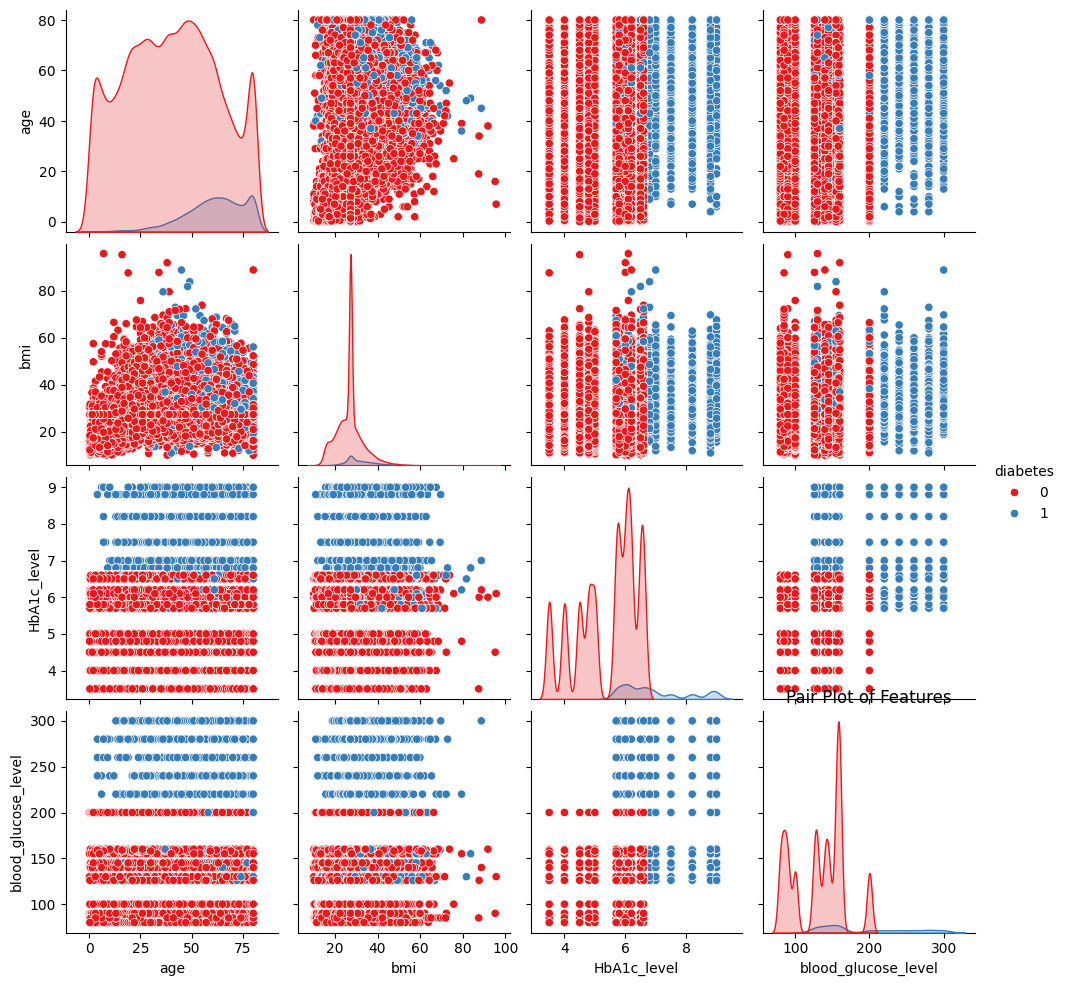

In [16]:
plt.figure(figsize=(12, 8))
sns.pairplot(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']], hue='diabetes', palette='Set1')
plt.title('Pair Plot of Features')
plt.show()

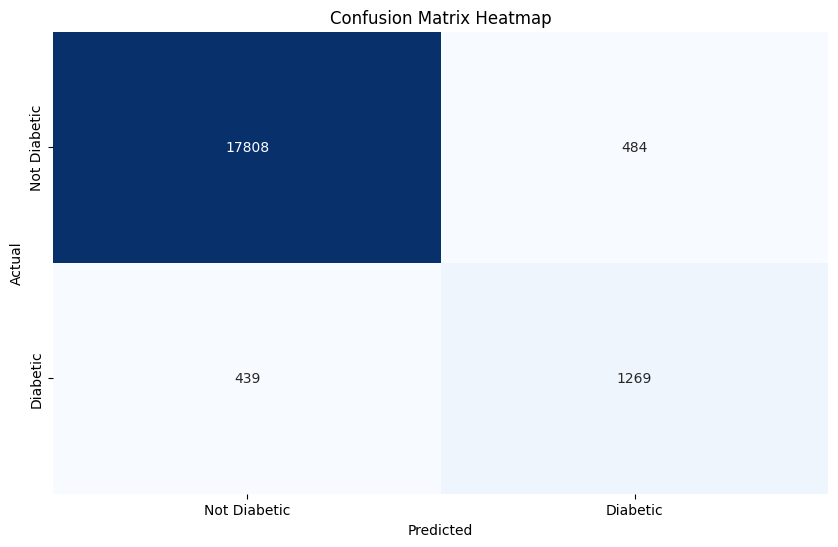

In [17]:
plt.figure(figsize=(10, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Diabetic', 'Diabetic'], yticklabels=['Not Diabetic', 'Diabetic'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

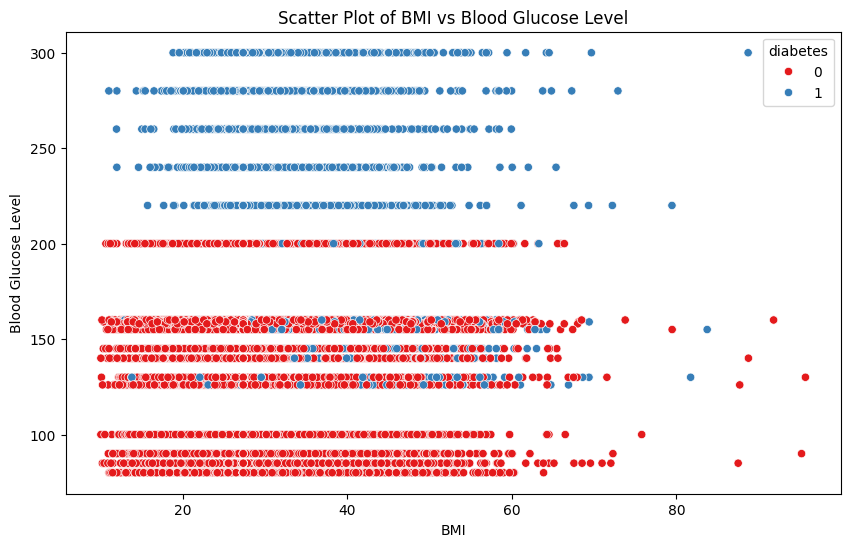

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='blood_glucose_level', hue='diabetes', data=df, palette='Set1')
plt.title('Scatter Plot of BMI vs Blood Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.show()

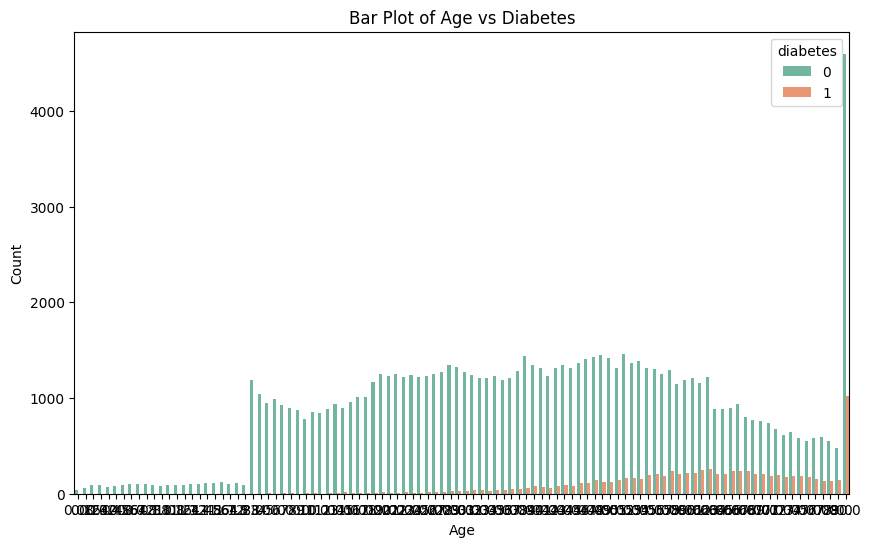

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='diabetes', data=df, palette='Set2')
plt.title('Bar Plot of Age vs Diabetes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [20]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df['Correct'] = results_df['Actual'] == results_df['Predicted']

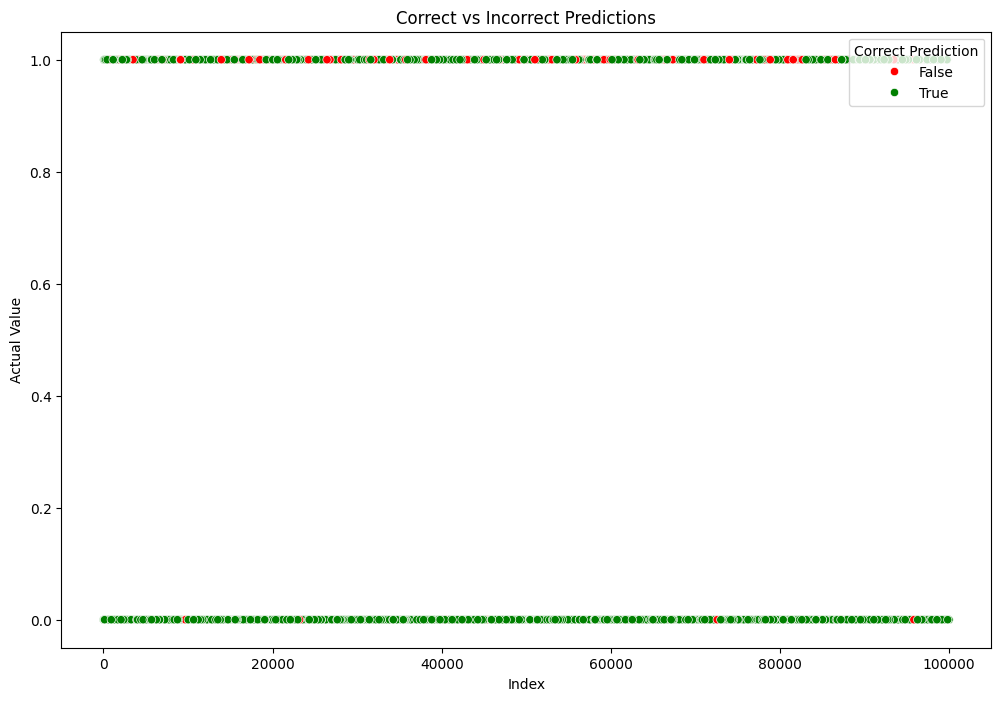

In [21]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=results_df.index, y=results_df['Actual'], hue=results_df['Correct'], palette={True: 'green', False: 'red'})
plt.title('Correct vs Incorrect Predictions')
plt.xlabel('Index')
plt.ylabel('Actual Value')
plt.legend(title='Correct Prediction', loc='upper right')
plt.show()

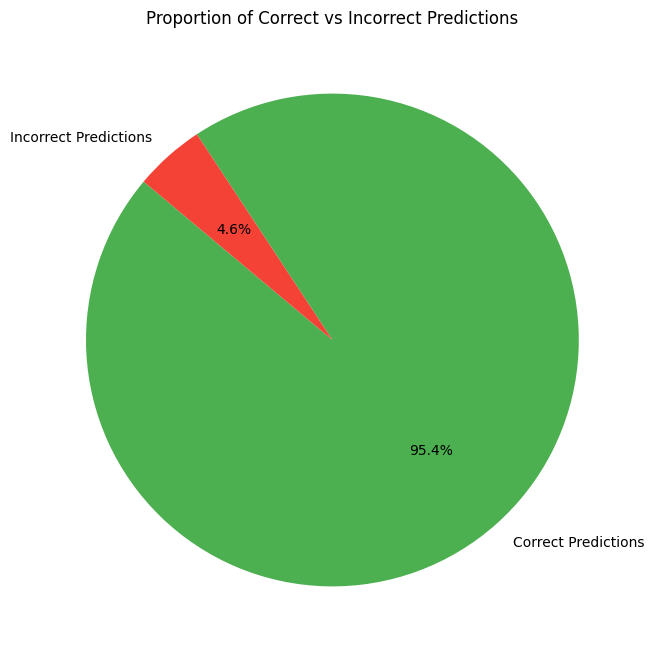

In [22]:
correct_count = results_df['Correct'].sum()
incorrect_count = len(results_df) - correct_count

plt.figure(figsize=(8, 8))
plt.pie([correct_count, incorrect_count], labels=['Correct Predictions', 'Incorrect Predictions'], autopct='%1.1f%%', colors=['#4CAF50', '#F44336'], startangle=140)
plt.title('Proportion of Correct vs Incorrect Predictions')
plt.show()

# **Model will Recommend that patient have Diabetes or Not**

In [24]:
def predict_diabetes():
    age = int(input("Enter your age: "))
    gender = int(input("Enter your gender (0 for Female, 1 for Male): "))
    hypertension = int(input("Do you have hypertension? (0 for No, 1 for Yes): "))
    heart_disease = int(input("Do you have heart disease? (0 for No, 1 for Yes): "))
    smoking_history = int(input("Enter your smoking history (0: Never, 1: Not Current, 2: Former, 3: Current, 4: Ever, 5: No Info): "))
    bmi = float(input("Enter your BMI: "))
    hba1c_level = float(input("Enter your HbA1c level: "))
    blood_glucose_level = float(input("Enter your blood glucose level: "))

    input_data = scaler.transform([[age, gender, hypertension, heart_disease, smoking_history, bmi, hba1c_level, blood_glucose_level]])

    prediction = models['Random Forest'].predict(input_data)

    if prediction[0] == 0:
        return "You are not likely to have diabetes."
    else:
        return "You are likely to have diabetes. Please consult with a doctor."

result = predict_diabetes()
print(result)

Enter your age: 45
Enter your gender (0 for Female, 1 for Male): 1
Do you have hypertension? (0 for No, 1 for Yes): 0
Do you have heart disease? (0 for No, 1 for Yes): 0
Enter your smoking history (0: Never, 1: Not Current, 2: Former, 3: Current, 4: Ever, 5: No Info): 1
Enter your BMI: 25.5
Enter your HbA1c level: 5.7
Enter your blood glucose level: 90
You are not likely to have diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
